In [3]:
import pandas as pd

df = pd.read_csv("./data/scrape.csv.gz")

In [4]:
df

,station,line,towards,contdown,time
0,Längenfeldgasse U,12A,Eichenstraße,"[6, 13, 24, 34, 44, 54, 64]",1.637752e+09
1,Längenfeldgasse U,12A,"Schmelz, Gablenzgasse","[1, 12, 21, 30, 40, 50, 60]",1.637752e+09
2,"Flurschützstraße, Längenfeldgasse",62,"Lainz, Wolkersbergenstraße","[3, 11, 17, 25, 32, 40, 47, 55, 62]",1.637752e+09
3,"Flurschützstraße, Längenfeldgasse",62,"Oper, Karlsplatz U","[0, 8, 14, 25, 30, 38, 45, 53, 60, 68]",1.637752e+09
4,Flurschützstraße / Längenfeldgasse,63A,Am Rosenhügel,"[0, 12, 22, 32, 42, 52, 59, 67]",1.637752e+09
...,...,...,...,...,...
711281,Längenfeldgasse,U4,HEILIGENSTADT,"[0, 6, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",1.638530e+09
711282,Längenfeldgasse,U4,HÜTTELDORF,"[1, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",1.638530e+09
711283,Längenfeldgasse,U6,FLORIDSDORF,"[4, 8, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47,...",1.638530e+09
711284,Längenfeldgasse,U6,SIEBENHIRTEN,"[1, 10, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09


In [5]:
df_u6S = df.loc[(df['line'] == 'U6') & (df['towards'] == 'SIEBENHIRTEN')]

In [6]:
import numpy as np
df_u6S = df.loc[(df['line'] == 'U6') & (df['towards'] == 'SIEBENHIRTEN')]
times = np.array(df_u6S['time'])

dt = np.diff(times, 1)
dtform = np.append([0], dt) # add an 0 at the beginning to match up with the df
df_u6S = df_u6S.assign(dt=dtform)

In [7]:
df_u6S

,station,line,towards,contdown,time,dt
9,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 6, 9, 13, 18, 21, 24, 29, 33, 37, 42, 45, ...",1.637752e+09,0.000000
21,Längenfeldgasse,U6,SIEBENHIRTEN,"[1, 5, 8, 12, 17, 20, 23, 28, 32, 36, 41, 44, ...",1.637752e+09,59.762884
33,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.322638
45,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.369688
57,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.416961
...,...,...,...,...,...,...
711236,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.379536
711248,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.323791
711260,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.387397
711272,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.333113


Objective: Calculate how long a particular time is displayed.

In [10]:
df_u6S_clean = df_u6S.loc[(df_u6S['dt'] < 12) & (df_u6S['dt'] > 6)]

In [11]:
dt = np.array(df_u6S_clean['dt'])
cntdwn = np.array(df_u6S_clean['contdown'])

import json

cntdwn = [json.loads(x) for x in cntdwn]


In [12]:
df_t_dt = pd.DataFrame(cntdwn)
df_t_dt.insert(0, 'dt', dt)
df_t_dt


,dt,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,10.322638,0,4,7.0,11.0,16.0,19.0,22.0,27.0,31.0,...,62.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.369688,0,4,7.0,11.0,16.0,19.0,22.0,27.0,31.0,...,62.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.416961,0,4,7.0,11.0,16.0,19.0,22.0,27.0,31.0,...,62.0,66.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.382459,2,5,9.0,14.0,17.0,20.0,25.0,29.0,33.0,...,64.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.374851,2,5,9.0,14.0,17.0,20.0,25.0,29.0,33.0,...,64.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54050,10.379536,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54051,10.323791,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54052,10.387397,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54053,10.333113,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Different approach with train-tracking

In [170]:
import json

# fix column name, reorder columns
df = df_u6S.rename(columns={'contdown':'countdown'})[['station', 'line', 'towards', 'time', 'countdown']]

# convert countdown list to columns
cntdwn = df['countdown']
cntdwn = pd.DataFrame([json.loads(x) for x in cntdwn])
cntdwn = cntdwn.set_index(df.index)

df_comb = pd.concat([df, cntdwn], axis=1).drop(columns='countdown')
df_subset = df_comb.iloc[19100:19200]
df_subset

,station,line,towards,time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
215508,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215520,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215532,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215544,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215556,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215568,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215580,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215592,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215604,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215616,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,23.0,33.0,43.0,53.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 32
df_subset

,station,line,towards,time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
215508,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215520,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215532,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215544,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215556,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215568,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215580,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215592,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215604,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215616,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,23.0,33.0,43.0,53.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
from datetime import datetime as dt
class vehicle():
    '''
    implements a vehicle class that is used internally to track vehicles across time
    '''
    def __init__(self, firstSeen, cntdwn, position) -> None:
        self.firstSeen = firstSeen # timestamp at which the vehicle was first seen
        self.arrivedAt = None # timestamp at which the vehicle actually arrived
        self.times = pd.DataFrame({'countdown': [cntdwn], 'start': [firstSeen], 'end': [pd.NA], 'complete': [False]}) # dataframe containing countdown value, start of countdown value and end of countdown value
        self.position = position
        self.arrived = False # to keep track if the vehicle has arrived yet or is still pending

    def arrive(self, time):
        self.arrived = True
        self.arrivedAt = time
        self.position = -1
        self.times.at[self.times.index[-1], 'end'] = time
        if len(self.times) > 1:
            # consider the track complete if there was an entry before
            self.times.at[self.times.index[-1], 'complete'] = True

    def trackTime(self, time, cntwns):
        # refreshes the times dataframe based on a new timestamp and a new countdown array

        if not self.times.at[self.times.index[-1], 'countdown'] == cntwns[self.position]:
            # if the time changed at the position of the vehicle, set the end time and start a new row
            self.times.at[self.times.index[-1], 'end'] = time

            if len(self.times) > 1:
                # the frist one is always incomplete. afterwards, the tracking is assumed to be complete.
                self.times.at[self.times.index[-1], 'complete'] = True

            self.times = self.times.append({'countdown': cntwns[self.position], 'start': time, 'end': pd.NA, 'complete': False}, ignore_index=True)
            
    def calculateDT(self):
        self.times['dt'] = self.times['end'] - self.times['start']

        hours = list()
        for idx, row in self.times.iterrows():
            t = dt.fromtimestamp(row['start'])
            hours.append(t.hour)

        self.times['hour'] = hours



In [455]:
# TODO: detect inconsistencies in the input data that screw everything up.
# At the moment, track depth has to be low in order to prevent screwups because of the inconsistencies.
# TODO: fix dtypes in df
# TODO: implement this in a nicer way

import logging
from tqdm import tqdm
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

traintrack = list()
all_vehicles = pd.DataFrame({'vehicle':[], 'arrived':[], 'active':[], 'lastPos':[]})
prev_cntwn = list()
max_diff = 15

df = df_comb.iloc[:]

for index, row in tqdm(df.iterrows(), total=len(df)):
    logging.debug(f"processing index{index}")
    row = row.dropna()
    row = row.iloc[:6]

# if there are no trains in the all_vehicles, we're on the first line and we have all new vehicles.
    if len(all_vehicles) == 0:
        for i, cntdwn in enumerate(row[4:].values):
            all_vehicles = all_vehicles.append({'vehicle': vehicle(row['time'], cntdwn, i), 'arrived':0, 'active': 1, 'lastPos':i, 'trackStart': row['time']}, ignore_index=True)
        
    
    else:
        # if there was a change, first check if the time difference was within limits
        if row['time'] - prev_row['time'] < max_diff:
            # do a tracking step
            # TODO: add new trains if they appear
            
            if row[0] > prev_cntwn[0]:
            #shift vehicle position by one if the next countdown is larger than the last one and set the first train to arrived
            #TODO: keep track of times

                logging.debug("shift frame by one")
                success = list()

                for idx, v in all_vehicles.loc[all_vehicles['active'] == 1].iterrows():
                    all_vehicles.at[idx, 'lastPos'] -= 1
                    all_vehicles.at[idx, 'vehicle'].position -= 1
                    
                    if all_vehicles.at[idx, 'lastPos'] < 0:
                        all_vehicles.at[idx, 'arrived'] = 1
                        all_vehicles.at[idx, 'active'] = 0
                        all_vehicles.at[idx, 'vehicle'].arrive(row['time'])

                    else:
                        all_vehicles.at[idx, 'vehicle'].trackTime(row['time'], row[4:].values)

                if len(row) == len(prev_row):
                    # if a train has arrived and the lengths of the arrays don't change, there must be a new vehicle.
                    all_vehicles = all_vehicles.append({'vehicle': vehicle(row['time'], row.values[-1], len(row[4:].values) -1), 'arrived':0, 'active': 1, 'lastPos':len(row[4:].values) -1, 'trackStart': row['time']}, ignore_index=True)

            else:
                # TODO
                # keep track of the changed times
                # add new trains if they appear (check len of na-free df)
                logging.debug("time changed without frameshift")

                success = list()
                for idx, v in all_vehicles.loc[all_vehicles['active'] == 1].iterrows():
                    all_vehicles.at[idx, 'vehicle'].trackTime(row['time'], row[4:].values)


                if len(row) > len(prev_row):
                    # if no train has arrived, but the length the countdown arrays has increased, there must be a new train as well.
                    all_vehicles = all_vehicles.append({'vehicle': vehicle(row['time'], row.values[-1], len(row[4:].values) -1), 'arrived':0, 'active': 1, 'lastPos':len(row[4:].values) -1, 'trackStart': row['time']}, ignore_index=True)

        else:
            # TODO
            # close all open trains and begin new ones
            logging.debug(f"time differnce over threshold ({row['time'] - prev_row['time']}). closing all trains")
            for idx, v in all_vehicles.loc[all_vehicles['active'] == 1].iterrows():
                all_vehicles.at[idx, 'active'] = 0

            for i, cntdwn in enumerate(row[4:].values):
                #opening new vehicles
                all_vehicles = all_vehicles.append({'vehicle': vehicle(row['time'], cntdwn, i), 'arrived':0, 'active': 1, 'lastPos':i, "trackStart": row['time']}, ignore_index=True)
            
    prev_row = row
    prev_cntwn = row[4:].values



100%|██████████| 55493/55493 [01:18<00:00, 703.58it/s]


In [456]:
for i, r in tqdm(all_vehicles.iterrows(), total=len(all_vehicles)):
    r['vehicle'].calculateDT()

100%|██████████| 3690/3690 [00:04<00:00, 869.30it/s]


In [457]:
complete_res = pd.DataFrame({'countdown': [], 'start': [], 'end': [], 'complete': [], 'hour': []})

for i, v in tqdm(all_vehicles.iterrows(), total=len(all_vehicles)):
    
    complete_res = complete_res.append(v['vehicle'].times, ignore_index=True)

100%|██████████| 3690/3690 [00:05<00:00, 703.44it/s]


In [462]:
complete_res_clean = complete_res.loc[complete_res['complete'] == 1]
complete_res_clean['end'] = complete_res_clean['end'].astype(float)
complete_res_clean['dt'] = complete_res_clean['dt'].astype(float)

/tmp/ipykernel_31845/3775985270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_res_clean['end'] = complete_res_clean['end'].astype(float)
/tmp/ipykernel_31845/3775985270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_res_clean['dt'] = complete_res_clean['dt'].astype(float)


In [463]:
complete_res_clean.describe()

,countdown,start,end,complete,hour,dt
count,14831.000000,1.483100e+04,1.483100e+04,14831.0,14831.000000,14831.000000
mean,4.792866,1.638192e+09,1.638192e+09,1.0,12.894882,61.753434
std,5.289436,2.047681e+05,2.047664e+05,0.0,6.169526,28.022302
min,0.000000,1.637752e+09,1.637752e+09,1.0,0.000000,0.000000
25%,1.000000,1.638033e+09,1.638033e+09,1.0,8.000000,41.544496
50%,4.000000,1.638191e+09,1.638191e+09,1.0,13.000000,51.993938
75%,6.000000,1.638370e+09,1.638370e+09,1.0,18.000000,72.494284
max,44.000000,1.638530e+09,1.638530e+09,1.0,23.000000,238.227070


In [501]:
pd.set_option("display.precision", 9)
complete_res_clean.loc[complete_res_clean['dt'] == 0]

,countdown,start,end,complete,hour,dt
147,0.0,1.637756338e+09,1.637756338e+09,1.0,13.0,0.0
149,9.0,1.637756338e+09,1.637756338e+09,1.0,13.0,0.0
151,0.0,1.637756348e+09,1.637756348e+09,1.0,13.0,0.0
153,9.0,1.637756348e+09,1.637756348e+09,1.0,13.0,0.0
155,0.0,1.637756358e+09,1.637756358e+09,1.0,13.0,0.0
157,9.0,1.637756358e+09,1.637756358e+09,1.0,13.0,0.0
159,0.0,1.637756369e+09,1.637756369e+09,1.0,13.0,0.0
161,9.0,1.637756369e+09,1.637756369e+09,1.0,13.0,0.0
166,1.0,1.637756412e+09,1.637756412e+09,1.0,13.0,0.0
170,1.0,1.637756422e+09,1.637756422e+09,1.0,13.0,0.0


In [504]:
df.loc[df['time'].between(1637756300, 1637756900)]

,station,line,towards,time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
4845,Längenfeldgasse,U6,SIEBENHIRTEN,1.637756306e+09,1,4,6.0,10.0,13.0,16.0,20.0,23.0,26.0,30.0,34.0,36.0,39.0,43.0,46.0,50.0,53.0,56.0,61.0,63.0,65.0,NaN,NaN,NaN,NaN,NaN
4857,Längenfeldgasse,U6,SIEBENHIRTEN,1.637756317e+09,1,4,6.0,10.0,13.0,16.0,20.0,23.0,26.0,30.0,34.0,36.0,39.0,43.0,46.0,50.0,53.0,56.0,61.0,63.0,65.0,NaN,NaN,NaN,NaN,NaN
4869,Längenfeldgasse,U6,SIEBENHIRTEN,1.637756327e+09,1,4,6.0,9.0,13.0,16.0,19.0,23.0,26.0,29.0,34.0,36.0,38.0,43.0,46.0,49.0,53.0,56.0,60.0,63.0,65.0,69.0,NaN,NaN,NaN,NaN
4880,Längenfeldgasse,U6,SIEBENHIRTEN,1.637756338e+09,0,9,14.0,17.0,20.0,24.0,28.0,30.0,33.0,37.0,40.0,44.0,47.0,50.0,54.0,57.0,60.0,64.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4881,Längenfeldgasse,U6,SIEBENHIRTEN,1.637756338e+09,1,4,6.0,9.0,13.0,16.0,19.0,23.0,26.0,29.0,34.0,36.0,38.0,43.0,46.0,49.0,53.0,56.0,60.0,63.0,65.0,69.0,NaN,NaN,NaN,NaN
4892,Längenfeldgasse,U6,SIEBENHIRTEN,1.637756348e+09,0,9,13.0,17.0,20.0,23.0,28.0,30.0,32.0,37.0,40.0,43.0,47.0,50.0,53.0,57.0,60.0,63.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4893,Längenfeldgasse,U6,SIEBENHIRTEN,1.637756348e+09,1,4,6.0,9.0,12.0,16.0,19.0,22.0,26.0,29.0,33.0,36.0,38.0,42.0,46.0,49.0,52.0,56.0,60.0,62.0,65.0,69.0,NaN,NaN,NaN,NaN
4904,Längenfeldgasse,U6,SIEBENHIRTEN,1.637756358e+09,0,9,13.0,17.0,20.0,23.0,28.0,30.0,32.0,37.0,40.0,43.0,47.0,50.0,53.0,57.0,60.0,63.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4905,Längenfeldgasse,U6,SIEBENHIRTEN,1.637756358e+09,1,4,6.0,9.0,12.0,16.0,19.0,22.0,26.0,29.0,33.0,36.0,38.0,42.0,46.0,49.0,52.0,56.0,60.0,62.0,65.0,69.0,NaN,NaN,NaN,NaN
4916,Längenfeldgasse,U6,SIEBENHIRTEN,1.637756369e+09,0,9,13.0,16.0,20.0,23.0,27.0,30.0,32.0,36.0,40.0,43.0,46.0,50.0,53.0,56.0,60.0,63.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


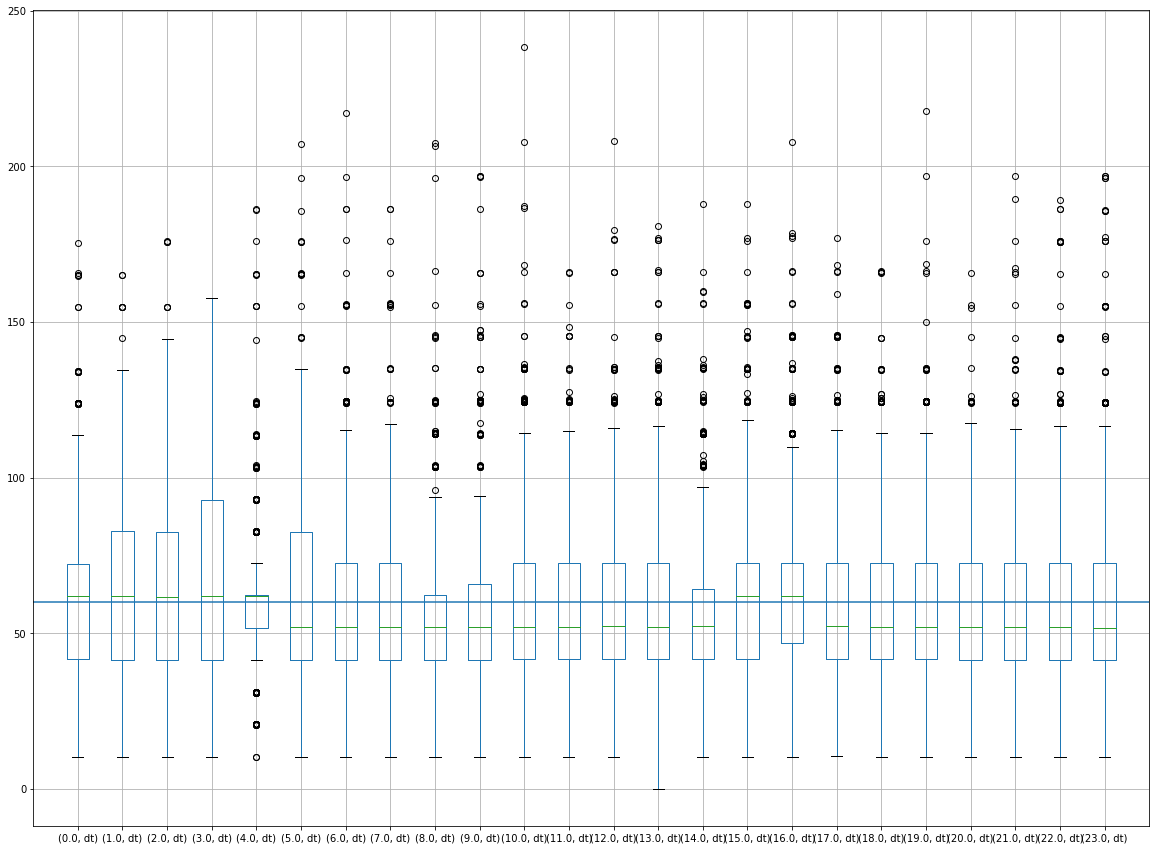

In [490]:
complete_res_clean[['hour', 'dt']].groupby(['hour']).boxplot(column='dt', subplots=False, figsize=(20,15))
plt.hlines(y=60, xmin=0, xmax=25)
plt.xlim((0,25))
plt.savefig("fig1.png")

<AxesSubplot:>

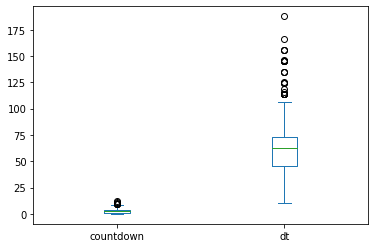

In [453]:
complete_res_clean = complete_res.loc[complete_res['complete'] == 1]
complete_res_clean[['countdown', 'dt']].plot.box('dt')

In [454]:
complete_res_clean.describe()

,countdown,start,complete,hour
count,226.000000,2.260000e+02,226.0,226.000000
mean,3.039823,1.637770e+09,1.0,16.500000
std,2.480718,3.801945e+03,0.0,1.108553
min,0.000000,1.637763e+09,1.0,15.000000
25%,1.000000,1.637766e+09,1.0,16.000000
50%,3.000000,1.637769e+09,1.0,16.000000
75%,4.000000,1.637773e+09,1.0,18.000000
max,12.000000,1.637776e+09,1.0,18.000000


In [421]:
complete_res_clean['end'] = complete_res_clean['end'].astype(float)
complete_res_clean['dt'] = complete_res_clean['dt'].astype(float)


/tmp/ipykernel_31845/3756521704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_res_clean['end'] = complete_res_clean['end'].astype(float)
/tmp/ipykernel_31845/3756521704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_res_clean['dt'] = complete_res_clean['dt'].astype(float)


In [505]:
x = pd.read_csv("./data/scrape.csv.gz")


In [521]:
x.loc[(x['time'].between(1.637756337e+09,1.63775740e+09 )) & (x['line'] == 'U6')]


,station,line,towards,contdown,time
4880,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 9, 14, 17, 20, 24, 28, 30, 33, 37, 40, 44,...",1.637756338e+09
4881,Längenfeldgasse,U6,SIEBENHIRTEN,"[1, 4, 6, 9, 13, 16, 19, 23, 26, 29, 34, 36, 3...",1.637756338e+09
4892,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 9, 13, 17, 20, 23, 28, 30, 32, 37, 40, 43,...",1.637756348e+09
4893,Längenfeldgasse,U6,SIEBENHIRTEN,"[1, 4, 6, 9, 12, 16, 19, 22, 26, 29, 33, 36, 3...",1.637756348e+09
4904,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 9, 13, 17, 20, 23, 28, 30, 32, 37, 40, 43,...",1.637756358e+09
...,...,...,...,...,...
6045,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 5, 9, 12, 16, 19, 21, 25, 29, 32, 35, 3...",1.637757371e+09
6056,Längenfeldgasse,U6,FLORIDSDORF,"[0, 9, 10, 13, 15, 19, 23, 26, 29, 33, 36, 39,...",1.637757381e+09
6057,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 5, 8, 12, 16, 18, 21, 25, 28, 32, 35, 3...",1.637757381e+09
6068,Längenfeldgasse,U6,FLORIDSDORF,"[0, 9, 10, 13, 15, 19, 23, 26, 29, 33, 36, 39,...",1.637757392e+09
